# 連続修正

In [4]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
set_plot_params()
name = Path().cwd().name + "/continuity_crrection"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


In [14]:
from math import comb, sqrt
from math import erf

# ==== 基本関数 ====
def normal_cdf(z):  # Φ(z)
    return 0.5 * (1 + erf(z / np.sqrt(2)))

def binom_pmf(n, p):
    k = np.arange(n + 1)
    pmf = np.array([comb(n, ki) * (p**ki) * ((1 - p) ** (n - ki)) for ki in k], dtype=float)
    return k, pmf

def exact_tail(n, p0, x, side="right"):
    k, pmf = binom_pmf(n, p0)
    if side == "right":
        return pmf[k >= x].sum()
    if side == "left":
        return pmf[k <= x].sum()
    # two-sided: small-probability two-tail (最小の両側確率)
    p_obs = pmf[x]
    return pmf[pmf <= p_obs].sum()

def normal_tail(n, p0, x, side="right", cc=True):
    mu = n * p0
    sigma = sqrt(n * p0 * (1 - p0))
    if side == "right":
        z = (x - (mu + (0.5 if cc else 0.0))) / sigma
        return 1 - normal_cdf(z)
    if side == "left":
        z = (x - (mu - (0.5 if cc else 0.0))) / sigma
        return normal_cdf(z)
    # two-sided
    # 上側は -0.5, 下側は +0.5 を使う
    z_up = (x - (mu + (0.5 if cc else 0.0))) / sigma
    z_lo = (x - (mu - (0.5 if cc else 0.0))) / sigma
    # 観測がどちら側かで片側pを選び2倍
    if x >= mu:
        p_one = 1 - normal_cdf(z_up)
    else:
        p_one = normal_cdf(z_lo)
    return 2 * p_one

n=40
p0=0.5
x=26
side="right"
cc=True

k, pmf = binom_pmf(n, p0)
mu = n * p0
sigma = sqrt(n * p0 * (1 - p0))
mu, sigma

(20.0, 3.1622776601683795)

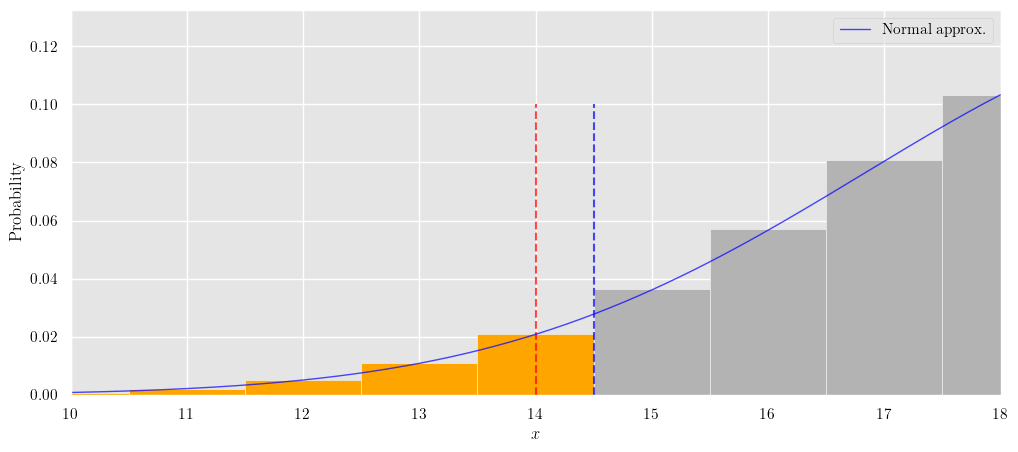

In [47]:
n=40
p0=0.5
x=14
side="left"
cc=True

k, pmf = binom_pmf(n, p0)
mu = n * p0
sigma = sqrt(n * p0 * (1 - p0))
mu, sigma
p_exact = exact_tail(n, p0, x, side)
p_norm_cc = normal_tail(n, p0, x, side, cc=True)
p_norm_nocc = normal_tail(n, p0, x, side, cc=False)

# 図
plt.figure(figsize=(12, 5))
ax = plt.gca()
# bar
bars = ax.bar(k, pmf, width=1, align="center")

# x以上を着色
for kk, rect in zip(k, bars):
    if kk <= x:
        rect.set_facecolor("orange")  # tail
    else:
        rect.set_facecolor("0.7")     # body (グレー)


ax.vlines(x=x, ymin=0, ymax=0.1, color="red", linestyle="dashed", alpha=0.7)
ax.vlines(x=x+0.5, ymin=0, ymax=0.1, color="blue", linestyle="dashed", alpha=0.7)

xs = np.linspace(-0.5, n + 0.5, 2000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xs - mu) / sigma) ** 2)
ax.plot(xs, pdf, color="blue", alpha=0.7, label="Normal approx.", linewidth=1)

ax.set_xlabel("$x$")
ax.set_ylabel("Probability")
ax.set_xlim(10, 18)

plt.legend()

plt.show()

In [37]:
from math import comb, sqrt
from math import erf

In [38]:
erf()

TypeError: math.erf() takes exactly one argument (0 given)